In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,LeaveOneOut,LeavePOut,validation_curve,learning_curve
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge,ARDRegression,Lasso, Ridge

In [3]:
df=pd.read_csv('Oxidation_ZrB2.csv')
print(df.columns)
df

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Oxide Thickness (um)',
       'Thermal Conductivity'],
      dtype='object')


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
0,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000,30,60,100.0,1900.0,1,60.0,800.0,57.869722
1,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000,30,60,98.0,1900.0,1,60.0,600.0,72.721701
2,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000,30,60,99.8,1800.0,1,60.0,380.0,57.188229
3,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000,30,60,98.1,1800.0,1,60.0,300.0,68.477731
4,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,2000,30,60,99.8,1800.0,1,60.0,192.0,57.188229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950,32,120,99.5,1550.0,1,600.0,125.0,56.375240
84,77.6,0.0,22.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1650,60,120,97.9,1627.0,1,10.0,45.0,61.010619
85,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950,32,45,98.0,2000.0,1,120.0,37.0,62.637512
86,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950,32,45,98.0,2000.0,1,240.0,80.0,62.637512


In [4]:
X = df[['ZrB2', 'HfB2', 'SiC', 'Ta', 'Si3N4',  'WC', 'LaB6', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]

Y = df["Oxide Thickness (um)"]


In [5]:
print(X.shape)
print(Y.shape)
df_concat = pd.concat([X, Y],axis =1)


(88, 15)
(88,)


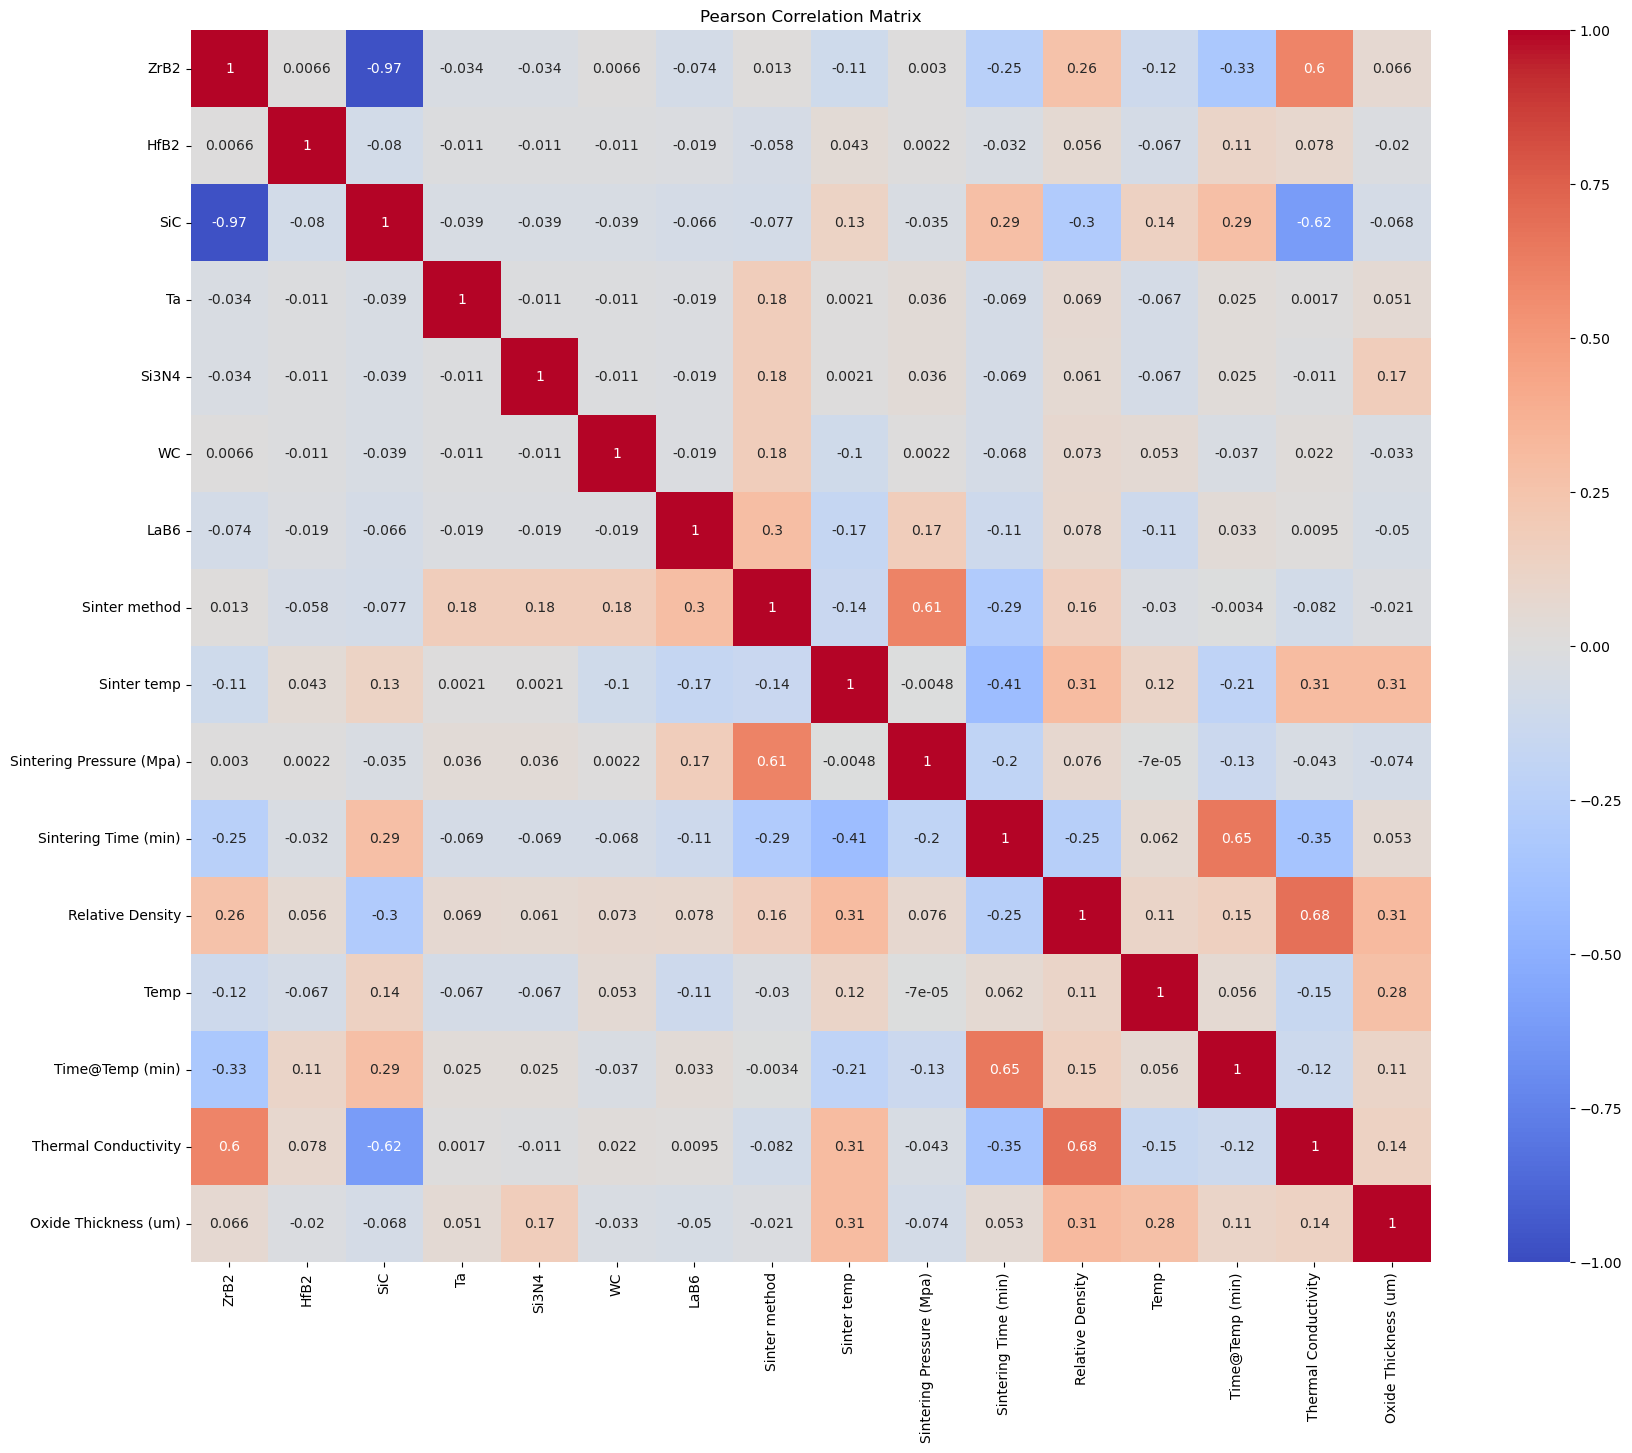

<Figure size 640x480 with 0 Axes>

In [6]:
corr_matrix = df_concat.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Matrix')
plt.show()
plt.savefig("Pearson_Correlation_Matrix.png", format='png')


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 44424.87428103212
R^2 Score: 0.18452833862706464


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regression model
n_estimators = 100  # Number of trees in the forest
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred1 = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)
print("R^2 Score:", r2)
from sklearn.metrics import mean_absolute_error

# Assuming y_test1 and y_pred1 are your true and predicted target values, respectively

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error:", mae)

Mean Squared Error: 23194.271518383845
R^2 Score: 0.6244459300826367
Mean Absolute Error: 102.33354761904762


In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if verbose:
        
        #print("Train MAE = {:.4f} in {}".format(train_mae, model_name))
        # print("Train R^2 = {:.4f} in {}".format(train_r2, model_name))
        #print("Test MAE = {:.4f} in {}".format(test_mae, model_name))
        print(".".format(test_r2, model_name))
        
    return model, y_test_pred, train_mae, train_r2, test_mae, test_r2

# Assuming you have a dictionary of regression models
regression_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR": KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN": KNeighborsRegressor()
}

# Iterate over the dictionary of models
for model_name, model in regression_models.items():
    _, y_test_pred, train_mae, train_r2, test_mae, test_r2 = make_regression(X_train, y_train, X_test, y_test,regression_models[model_name], model_name, verbose=True)
    print("R2 of", model_name, "=", test_r2)
    print("MAE of", model_name, "=", test_mae)
    #print("Train MAE of", model_name, "=", train_mae)
    #print("Train R2 of", model_name, "=", train_r2)


.
R2 of DecisionTree = 0.43029507075986173
MAE of DecisionTree = 126.72222222222223
.
R2 of SVR = -0.3065116575109692
MAE of SVR = 166.3613247631939
.
R2 of RandomForest = 0.6938989638672313
MAE of RandomForest = 85.24840740740743
.
R2 of XGBoost = 0.4886684586958435
MAE of XGBoost = 120.3445037206014
.
R2 of KRR = 0.10985934607753178
MAE of KRR = 154.56106870867998
.
R2 of ABR = 0.5027063750948901
MAE of ABR = 121.55612407928275
.
R2 of GBR = 0.654458899648245
MAE of GBR = 89.70745420736388
.
R2 of ETR = 0.37162897814798745
MAE of ETR = 127.86055555555556
.
R2 of KNN = 0.43770646744911423
MAE of KNN = 129.67777777777778


In [10]:
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
GBR.fit(X_train, y_train)

# Predict on the test set
y_pred = GBR.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Average Error:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Average Error: 89.43198513823364
R^2 Score: 0.6549359376334543


In [11]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
gbr = GradientBoostingRegressor()

# Define the parameter grid
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 3, 4]
}

# GridSearchCV for Gradient Boosting
grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid_gbr, cv=5, n_jobs=-1, verbose=2)
grid_search_gbr.fit(X_train, y_train)
y_pred = grid_search_gbr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Average Error:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)
# Best parameters and score
print("Best parameters for Gradient Boosting: ", grid_search_gbr.best_params_)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Mean Average Error: 75.76260451955388
R^2 Score: 0.7200661753230011
Best parameters for Gradient Boosting:  {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 1.0}


Mean Average Error: 75.75736978857388
R^2 Score: 0.7200796956210442


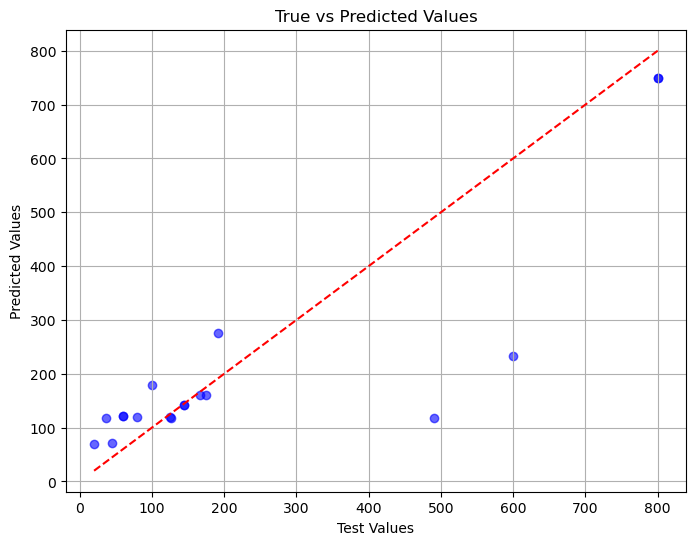

<Figure size 640x480 with 0 Axes>

In [12]:
best_params = grid_search_gbr.best_params_
best_model = GradientBoostingRegressor(**best_params,random_state =42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Average Error:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted Values')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.grid(True)
plt.show()
plt.savefig("True_vs_Predicted_Values.png", format='png')


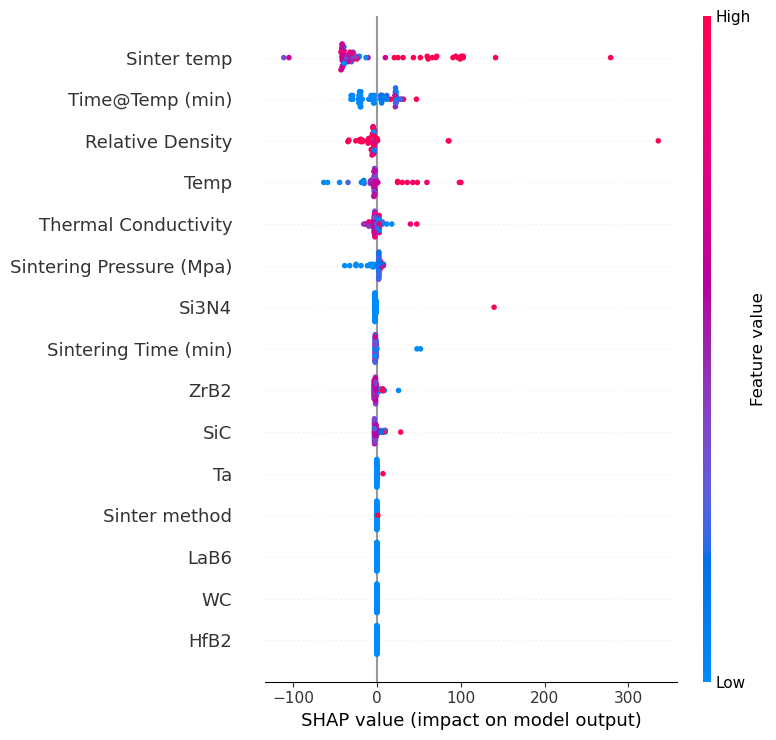

In [13]:
import shap
explainer = shap.Explainer(best_model, X_train)

# Calculate SHAP values
shap_values = explainer(X_train,check_additivity=False)

# Summary plot (global interpretation)
shap.summary_plot(shap_values, X_train)

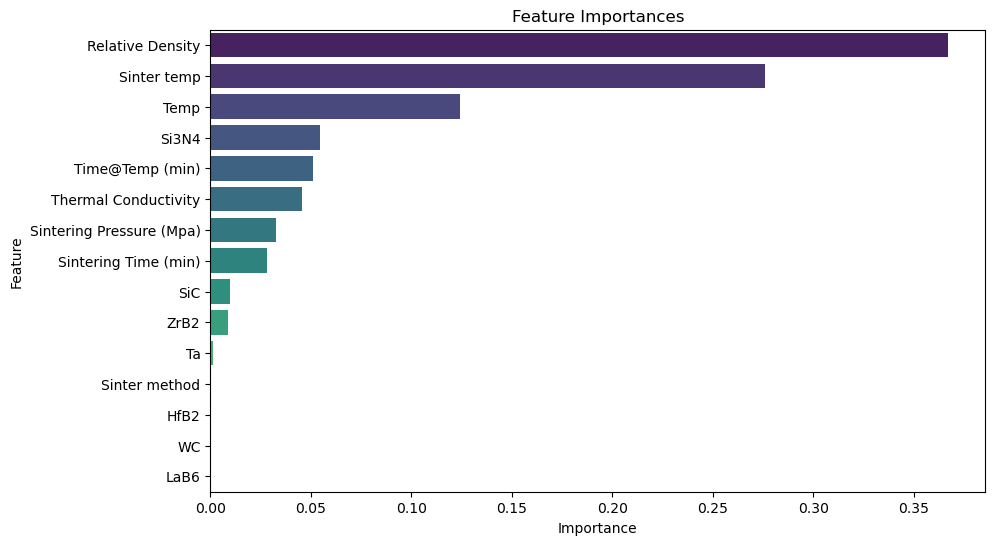

<Figure size 640x480 with 0 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X1 is your dataset and best_model is your trained model
importances = best_model.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance
features = features.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features, orient='h', palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.savefig("Feature_Importances.png", format='png')

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
   
    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)
    
    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    # Print evaluation metrics for this fold
    print(f"  Validation R^2: {r2:.4f}")
    print(f"  Validation MSE: {mse:.4f}")
    print(f"  Validation MAE: {mae:.4f}")

# Calculate the average scores across all folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print(f"\nAverage Validation MSE: {average_mse:.4f}")
print(f"Average Validation MAE: {average_mae:.4f}")
print(f"Average Validation R^2: {average_r2:.4f}")


Fold 1/5
  Validation R^2: 0.7201
  Validation MSE: 17287.9169
  Validation MAE: 75.7574
Fold 2/5
  Validation R^2: 0.8085
  Validation MSE: 2664.0501
  Validation MAE: 42.6883
Fold 3/5
  Validation R^2: 0.8031
  Validation MSE: 3779.0025
  Validation MAE: 50.8970
Fold 4/5
  Validation R^2: 0.7399
  Validation MSE: 2828.3340
  Validation MAE: 40.2077
Fold 5/5
  Validation R^2: 0.8431
  Validation MSE: 11189.2884
  Validation MAE: 67.4327

Average Validation MSE: 7549.7184
Average Validation MAE: 55.3966
Average Validation R^2: 0.7829


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Fit the model to the training data
    gbr.fit(X_train, y_train)

    
    # Calculate R² score for training data
    y_pred_train = gbr.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    train_r2_scores.append(train_r2)
   
    
    print(f"  Training R^2: {train_r2:.4f}")
    



# Calculate the average R² score across all folds for training and validation data
average_train_r2 = np.mean(train_r2_scores)
print(f"\nAverage Training R²: {average_train_r2:.4f}")



Fold 1/5
  Training R^2: 0.9894
Fold 2/5
  Training R^2: 0.9845
Fold 3/5
  Training R^2: 0.9916
Fold 4/5
  Training R^2: 0.9893
Fold 5/5
  Training R^2: 0.9844

Average Training R²: 0.9878


In [17]:
dataframe=pd.read_csv('thermal_conductivity_vs_SiC_concentration.csv')
print(dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label',
       'Thermal Conductivity'],
      dtype='object')


In [18]:
x= dataframe[['ZrB2', 'HfB2', 'SiC', 'Ta', 'Si3N4',  'WC', 'LaB6', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]
y_predict_oxide = gbr.predict(x)
dataframe["Oxide Thickness"] = y_predict_oxide
dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label,Thermal Conductivity,Oxide Thickness
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,68.552480,909.612720
1,97.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,68.712139,840.738904
2,95.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,68.712139,840.738904
3,92.5,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,68.588885,909.612720
4,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,68.681364,909.612720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1100.0,1,60.0,4,60.718832,740.953899
81,67.5,0.0,32.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1100.0,1,60.0,4,59.535127,771.387368
82,65.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1100.0,1,60.0,4,57.535784,750.703947
83,60.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1100.0,1,60.0,4,56.985449,744.826782


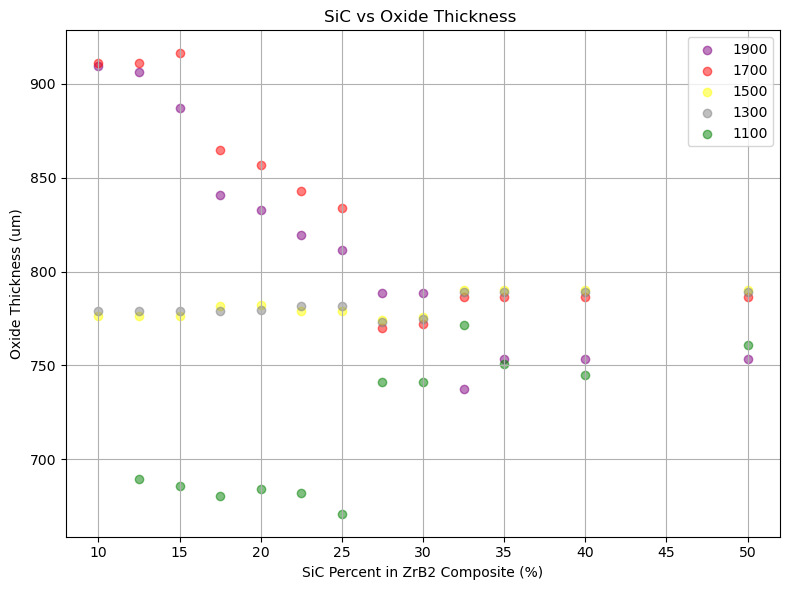

In [19]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot for the first segment (0-14)
plt.scatter(dataframe['SiC'][4:17], dataframe['Oxide Thickness'][4:17], color='purple', alpha=0.5, label='1900')  

# Scatter plot for the second segment (15-29)
plt.scatter(dataframe['SiC'][21:34], dataframe['Oxide Thickness'][21:34], color='red', alpha=0.5, label='1700')

# Scatter plot for the third segment (30-44)
plt.scatter(dataframe['SiC'][38:51], dataframe['Oxide Thickness'][38:51], color='yellow', alpha=0.5, label='1500')

# Scatter plot for the fourth segment (45-59)
plt.scatter(dataframe['SiC'][55:68], dataframe['Oxide Thickness'][55:68], color='grey', alpha=0.5, label='1300')
plt.scatter(dataframe['SiC'][73:85], dataframe['Oxide Thickness'][73:85], color='green', alpha=0.5, label='1100')

# Add title and labels
plt.title('SiC vs Oxide Thickness ')  
plt.xlabel('SiC Percent in ZrB2 Composite (%)') 
plt.ylabel('Oxide Thickness (um)')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot
plt.savefig("SiC_conc_vs_Oxide_Scale_thickness.png", format='png')

# Show the plot
plt.show()


In [20]:
Dataframe=pd.read_csv('temp_vs_oxide_thickness.csv')
print(Dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label',
       'Thermal Conductivity'],
      dtype='object')


In [21]:
X_testing = Dataframe[['ZrB2', 'HfB2', 'SiC', 'Ta', 'Si3N4',  'WC', 'LaB6', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]
y_predict_oxide = gbr.predict(X_testing)

In [22]:
Dataframe["Oxide Thickness"] = y_predict_oxide
Dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label,Thermal Conductivity,Oxide Thickness
0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,66.875836,832.802278
1,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1800.0,1,60.0,4,66.314624,832.802278
2,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1700.0,1,60.0,4,66.622246,856.685768
3,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1600.0,1,60.0,4,66.970240,784.467737
4,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1500.0,1,60.0,4,67.048969,782.036491
5,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1400.0,1,60.0,4,66.943979,793.402535
6,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1300.0,1,60.0,4,67.882331,779.506444
7,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1200.0,1,60.0,4,71.138951,705.975637
8,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1100.0,1,60.0,4,72.670535,684.227823
9,75.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,64.279137,811.269746


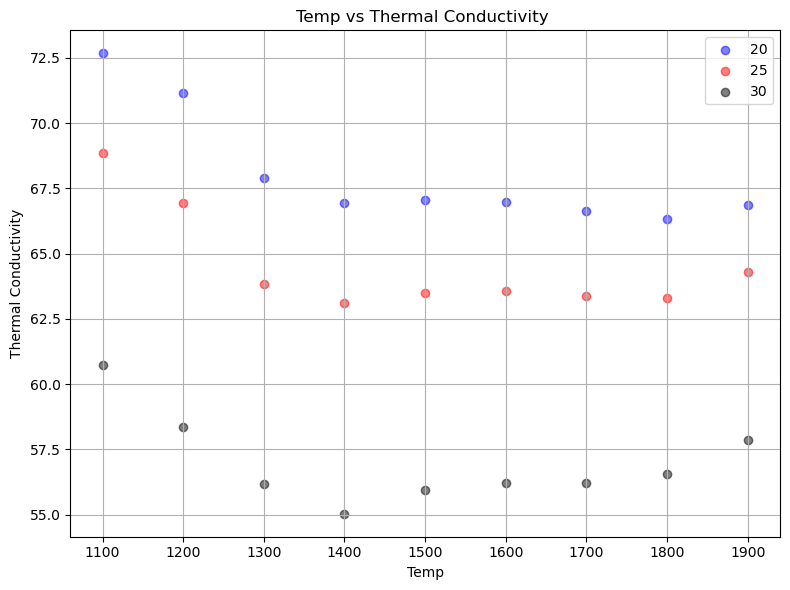

In [23]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot for the first segment (0-14)
plt.scatter(Dataframe['Temp'][0:9], Dataframe['Thermal Conductivity'][0:9], color='blue', alpha=0.5, label='20')  

# Scatter plot for the second segment (15-29)
plt.scatter(Dataframe['Temp'][9:18], Dataframe['Thermal Conductivity'][9:18], color='red', alpha=0.5, label='25')

# Scatter plot for the third segment (30-44)
plt.scatter(Dataframe['Temp'][18:27], Dataframe['Thermal Conductivity'][18:27], color='black', alpha=0.5, label='30')


# Add title and labels
plt.title('Temp vs Thermal Conductivity ')  
plt.xlabel('Temp') 
plt.ylabel('Thermal Conductivity')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot
plt.savefig("Temp_vs_Thermal_Conductivity.png", format='png')

# Show the plot
plt.show()


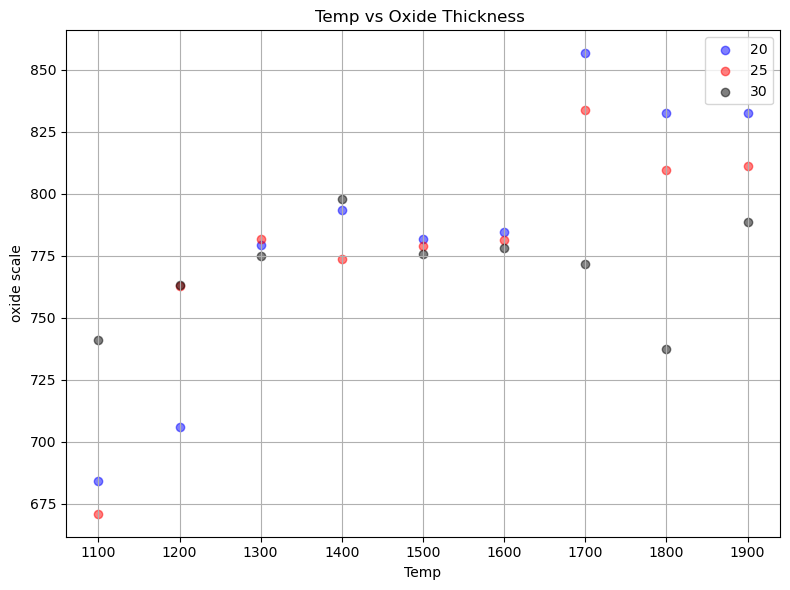

In [24]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot for the first segment (0-14)
plt.scatter(Dataframe['Temp'][0:9], Dataframe['Oxide Thickness'][0:9], color='blue', alpha=0.5, label='20')  

# Scatter plot for the second segment (15-29)
plt.scatter(Dataframe['Temp'][9:18], Dataframe['Oxide Thickness'][9:18], color='red', alpha=0.5, label='25')

# Scatter plot for the third segment (30-44)
plt.scatter(Dataframe['Temp'][18:27], Dataframe['Oxide Thickness'][18:27], color='black', alpha=0.5, label='30')


# Add title and labels
plt.title('Temp vs Oxide Thickness ')  
plt.xlabel('Temp') 
plt.ylabel('oxide scale')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot

plt.savefig("Temp_vs_Oxide_Thickness.png", format='png')

# Show the plot
plt.show()


In [ ]:
rf = RandomForestRegressor()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=300,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=300,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=4, n_estimators=100,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=100,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, 

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=2, n_estimators=300,

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, min_samples_split=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total t

/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/anubhavgupta/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

In [ ]:
best_paramters = grid_search_rf.best_params_
rf = RandomForestRegressor(**best_paramters,random_state =42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Average Error:", mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
   
    # Make predictions on the validation set
    y_pred = rf.predict(X_val)
    
    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    # Print evaluation metrics for this fold
    print(f"  Validation R^2: {r2:.4f}")
    print(f"  Validation MSE: {mse:.4f}")
    print(f"  Validation MAE: {mae:.4f}")

# Calculate the average scores across all folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print(f"\nAverage Validation MSE: {average_mse:.4f}")
print(f"Average Validation MAE: {average_mae:.4f}")
print(f"Average Validation R^2: {average_r2:.4f}")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
    
    # Fit the model to the training data
    rf.fit(X_train, y_train)

    
    # Calculate R² score for training data
    y_pred_train = rf.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    train_r2_scores.append(train_r2)
   
    
    print(f"  Training R^2: {train_r2:.4f}")
    



# Calculate the average R² score across all folds for training and validation data
average_train_r2 = np.mean(train_r2_scores)
print(f"\nAverage Training R²: {average_train_r2:.4f}")

